# Machine Learning Lab - Hackathon

**Summer Term 2021**

- Julian Stier <julian.stier@uni-passau.de>
- Sahib Julka <sahib.julka@uni-passau.de>
- [StudIP Machine Learning Lab](https://studip.uni-passau.de/studip/dispatch.php/course/scm?cid=42befdd6822ee2029b26fa475cd02f60)
- [FimGIT repositories](https://fimgit.fim.uni-passau.de/groups/padas/21ss-mllab/)

**General Remarks**
- You have time from 09:00 AM until 03:00 PM to work on the hackathon task.
- Go through the notebook, answer questions, solve described tasks and fill out empty spaces or add cells based on your creativity.
- Re-use previous implementations (of your own!) by either importing according python modules or copying it into the notebook.
- Your overall git repository acts as the official submission. Put the hackathon notebook also into the git repository, alongside with any previous notebooks or python implementations you already uploaded.
- If one of your implementation required for this notebook has not been working previously, you can now work on that specifically and try to solve it within the given time frame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shubov_algorithms import metrics,helpers, naive_bayes, linear_regression, logistic_regression, support_vector_machine, neural_network, k_means, decision_trees

# Step I: Prepare Your Data

- Download the two datasets.
- Read it into memory.
- Understand the feature shape and number of targets.
- Split both datasets into three fixed train-validation-test sets with own chosen proportions. You can e.g. use 80% of the data for training, 10% of the data for the validation set and 10% for the test set. Make sure you shuffle the data in before once.

### UCI Dataset: Abalone
> https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

In [2]:
!mkdir abalone
!curl -o ./abalone/abalone.data "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
!curl -o ./abalone/abalone.names "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names"
!cat ./abalone/abalone.names

mkdir: abalone: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0   167k      0  0:00:01  0:00:01 --:--:--  167k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4319  100  4319    0     0   6769      0 --:--:-- --:--:-- --:--:--  6758:--     0
1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

  

In [3]:
col_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
uci_df = pd.read_csv("./abalone/abalone.data", header=None, names=col_names)
uci_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
uci_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##### transform to numpy array

In [5]:
uci_numpy_data = uci_df.to_numpy()

##### shuffle the dataset

In [6]:
np.random.shuffle(uci_numpy_data)

##### split the dataset into features and labels arrays

In [7]:
uci_features, uci_labels = uci_numpy_data[:, :8], uci_numpy_data[:, 8]

##### transform labels

In [8]:
uci_labels = helpers.transform_targets_to_numbers(uci_labels)
uci_number_of_unique_labels = len(np.unique(uci_labels))
print(len(np.unique(uci_labels)), np.unique(uci_labels), np.shape(uci_labels))

28 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] (4177,)


##### convert numerical features to binary

In [9]:
# cut all the numerical features
uci_numerical_features = uci_features[:,1:]
uci_binary_features = helpers.to_binary_features(uci_numerical_features, num_bins=4)
np.shape(uci_binary_features)

(4177, 28)

##### convert Sex feature to number values

In [10]:
uci_feature_sex = uci_features[:,0]

# label_names = np.unique(uci_feature_sex)
# labels2index = {name: ix for name, ix in zip(label_names, range(len(label_names)))}
# uci_feature_sex_numerical = np.array([labels2index[name] for name in uci_feature_sex])

uci_feature_sex_binary = helpers.transform_to_binary(uci_feature_sex)
np.shape(uci_feature_sex_binary)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


(4177, 3)

##### Combine transformed features

In [11]:
#uci_features_for_classification = np.append([[x] for x in uci_feature_sex_numerical], uci_binary_features, axis=1)
uci_features_for_classification = np.concatenate((uci_feature_sex_binary,uci_binary_features), axis=1)
np.shape(uci_features_for_classification)

(4177, 31)

##### split the dataset into train, validation and test datasets

In [12]:
uci_features_train, uci_features_valid, uci_features_test = helpers.split_data3(uci_features_for_classification)
uci_labels_train, uci_labels_valid, uci_labels_test = helpers.split_data3(uci_labels)

#### The same things, but as a function

In [13]:
def data_preprocessing_abalone(uci_numpy_data, num_bins=4):
    uci_features, uci_labels = uci_numpy_data[:, :8], uci_numpy_data[:, 8]
    uci_labels = helpers.transform_targets_to_numbers(uci_labels)
    uci_numerical_features = uci_features[:,1:]
    uci_binary_features = helpers.to_binary_features(uci_numerical_features, num_bins=num_bins)
    uci_feature_sex = uci_features[:,0]
    label_names = np.unique(uci_feature_sex)
    labels2index = {name: ix for name, ix in zip(label_names, range(len(label_names)))}
    uci_feature_sex_numerical = np.array([labels2index[name] for name in uci_feature_sex])
    uci_features_for_classification = np.append([[x] for x in uci_feature_sex_numerical], uci_binary_features, axis=1)
    uci_features_train, uci_features_valid, uci_features_test = helpers.split_data3(uci_features_for_classification)
    uci_labels_train, uci_labels_valid, uci_labels_test = helpers.split_data3(uci_labels)

    return uci_features_train, uci_features_valid, uci_features_test, uci_labels_train, uci_labels_valid, uci_labels_test

### Fashion-MNIST

##### Functions to read byte files

In [14]:
# Source of inspiration:
# https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
# the number of images found experimentally
def read_byte_images(file_path, num_images=60000):
    f = open(file_path, "rb")
    image_size = 28
    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    return data.reshape(num_images, image_size, image_size, 1)

def read_byte_labels(file_path, num_images=60000):
    f = open(file_path, "rb")
    f.read(8)
    labels = []
    for i in range(0,num_images):
        buf = f.read(1)
        label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        labels.append(label[0])
    return labels

##### Get Images

In [15]:
fmnist_images = read_byte_images("fashion_mnist/train-images-idx3-ubyte")
np.shape(fmnist_images)

(60000, 28, 28, 1)

##### Display an image

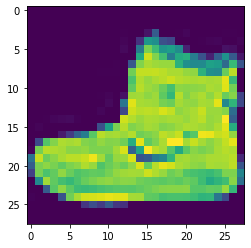

In [16]:
image = np.asarray(fmnist_images[0]).squeeze()
plt.imshow(image)
plt.show()

##### Get labels

In [17]:
fmnist_labels = read_byte_labels("fashion_mnist/train-labels-idx1-ubyte", 60000)
np.shape(fmnist_labels)

(60000,)

##### split the dataset into train, validation and test datasets

In [18]:
fmnist_features_train, fmnist_features_valid, fmnist_features_test = helpers.split_data3(fmnist_images)
fmnist_labels_train, fmnist_labels_valid, fmnist_labels_test = helpers.split_data3(fmnist_labels)

# Step II: Choose a Baseline Classifier

* Choose a baseline classifier - except the neural network classifier - you have been working with over the semester and let it learn based on the **small** dataset
* Provide some error measure or indicator whether your classifier learned, e.g. loss over multiple steps or the number of correctly classified samples on the training set or similar

In [14]:
model_naive_bayes = naive_bayes.NaiveBayesClassifier(len(np.unique(uci_labels_train)))
model_naive_bayes.learn(uci_features_train.astype(int), uci_labels_train.astype(int))

# Step III: Provide Evaluation Metrics for the Classifier Interface

* Given the class interface for machine learning models, use the predicted target from the result of an model.infer()-invocation to calculate precision, recall and f1-score given the actual test-set targets.
* Do not use scikit-learn or similar libraries; but you can orientate on such interfaces or implementations.
* Note, that a model can return two or multiple classes based on the problem it learned.

In [15]:
uci_predicted = model_naive_bayes.infer(uci_features_test)
metrics.print_avg_metrics(uci_labels_test, uci_predicted)

Accuracy: 25.598086124401913
Recall: 0.16028708133971292
Precision: 10.966473789765063
F1 Score: 0.3052476572836251


> https://en.wikipedia.org/wiki/Precision_and_recall

$precision = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$

$recall = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$

### Testing your implementation
You can use below vectors as a reference for testing the output of infer() and the target vector of a 10-class-classifier. The *f1_score* method of scikit learn gives you a reference on how the values need to look like. Using the function is of course not a valid solution.

In [16]:
example_baseline_predicted = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9])
example_baseline_test_target = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 3, 3, 3, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 4, 4, 5, 8, 8])

In [17]:
np.mean(metrics.compute_f1_score(example_baseline_test_target, example_baseline_predicted))

0.9378972726341148

In [18]:
np.mean(metrics.compute_f1_score(uci_labels_test,uci_predicted))

0.3052476572836251

# Step IV: Experiment (1) Hyperparameter Choice of Baseline Classifier

* Use one fixed train-validation-test split.
* Choose a hyperparameter of your baseline classifier.
* Conduct a grid search to find the best suitable value for it. Let the classifier learn on the training set and use an evaluation metric on the validation set (not the test set!) to find out which hyperparameter value works best for your classifier on the data.

In [19]:
possible_hp_values = np.arange(1, 10, 1)
best_hp_value = None
best_f1_score = -np.infty
for hp_value in possible_hp_values:
    nb_f_train, nb_f_valid, nb_f_test, nb_l_train, nb_l_valid, nb_l_test = data_preprocessing_abalone(uci_numpy_data, num_bins=hp_value)
    # 1. create a baseline classifier object with hp_value specified
    current_model = naive_bayes.NaiveBayesClassifier(uci_number_of_unique_labels)
    
    # 2. learn the classifier on the training set
    current_model.learn(nb_f_train, nb_l_train)
    
    # 3. evaluate the model on the validation set
    prediction = current_model.infer(nb_f_valid)
    
    f1_score =  np.mean(metrics.compute_f1_score(nb_l_valid, prediction))
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_hp_value = hp_value

print("Found hyperparameter value", best_hp_value)
print("Best f1-score on validation set", best_f1_score)

uci_nb_f_train, _, uci_nb_f_test, uci_nb_l_train, _, uci_nb_l_test = data_preprocessing_abalone(uci_numpy_data, num_bins=best_hp_value)

test_model = naive_bayes.NaiveBayesClassifier(uci_number_of_unique_labels)
test_model.learn(uci_nb_f_train, uci_nb_l_train)
prediction = test_model.infer(uci_nb_f_test)
test_f1_score = metrics.compute_f1_score(uci_nb_l_test, prediction)
print("F1-Score on test set", np.mean(test_f1_score))

Found hyperparameter value 9
Best f1-score on validation set 0.3106222436659307
F1-Score on test set 0.5148206757171587


# Step V: Use a Neural Network Classifier

- Let a neural network learn on the training set and report its evaluation metric on the **validation** set.

Loss after iteration 0: 2.537846
Loss after iteration 1000: 2.549415
Loss after iteration 2000: 2.515284
Loss after iteration 3000: 2.243671
Loss after iteration 4000: 2.280138
Loss after iteration 5000: 2.184386
Loss after iteration 6000: 2.276024
Loss after iteration 7000: 2.244101
Loss after iteration 8000: 2.209638
Loss after iteration 9000: 2.132054
Loss after iteration 10000: 2.195749
Loss after iteration 11000: 2.207696
Loss after iteration 12000: 2.201797
Loss after iteration 13000: 2.145198
Loss after iteration 14000: 2.258692
Loss after iteration 15000: 2.213013
Loss after iteration 16000: 2.208448
Loss after iteration 17000: 2.259952
Loss after iteration 18000: 2.089610
Loss after iteration 19000: 1.971979


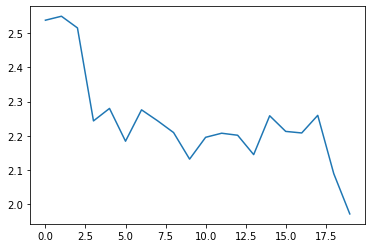

In [20]:
input_dim = len(uci_features_for_classification[0])
output_dim = len(np.unique(uci_labels))
inner_dim = input_dim + 1
nn_model = neural_network.NeuralNetwork(input_dim=input_dim, output_dim=output_dim, hidden_dimension=inner_dim, print_loss=True, print_step=1000)
nn_model.learn(uci_features_train, uci_labels_train)

In [21]:
nn_prediction = nn_model.infer(uci_features_test)

metrics.print_avg_metrics(uci_labels_test, nn_prediction)

Accuracy: 26.31578947368421
Recall: 0.15789473684210525
Precision: 14.904560563754211
F1 Score: 0.302203584528501


# Step VI: Experiment (2) Hyperparameter Choice of Neural Net

- choose a hyperparameter of your neural net, e.g. the number of neurons in the first hidden layer or the learning rate for SGD
- (iteratively) create models for each hyperparameter setting, e.g. the number of neurons h=10,20,30,40,50,60,70,80,90,100
- train the neural net on the train set and evaluate it over your validation set
- keep all models with each hyperparameter setting and determine which is the best performing model on the validation set
- evaluate them also on the test set. is the best model on the validation set with its hyperparameter also the best model on the test set?

# Step VII: Experiment (3) Neural Net Stability on Shuffled Data

- over multiple runs $r \geq 5, r\in\mathbb{N}$ randomly shuffle your training data
- split it into a train-test, e.g. 90% of the data is for training, 10% for testing
- what are the mean and standard deviation of your models over multiple runs?
- plot a boxplot with matplotlib/seaborn of the stability of your model

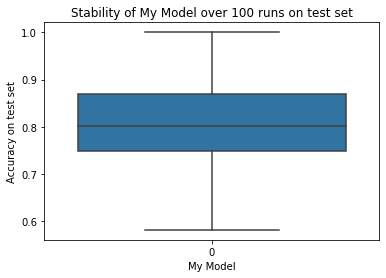

In [27]:
example_results = np.minimum(np.random.normal(0.8, 0.1, (100,)), 1)
sns.boxplot(data=example_results)
plt.title("Stability of My Model over 100 runs on test set")
plt.ylabel("Accuracy on test set")
plt.xlabel("My Model")
plt.show()

# Step VIII: Bonus: implement Momentum SGD / ADAM / ..

- this task is optional if you have time at the end
- inspect your stochastic gradient descent implementation
- have a look at online examples such as [wiseodd.github.com](https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/) for implementations of variants on stochastic gradient such as with Nesterov Momentum or ADAM
- change your implementation of SGD to one or multiple of these variants and try a simple run of your neural net and compare it with previous results
- sketch a first design of an optimizer-class which is fed with parameters of your model and performs the update step 